<a href="https://colab.research.google.com/github/Giriankur/Twitter-Disaster-Dataset-Project_07/blob/main/twitter_disaster_25_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Exploration and Preparation


In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving twitter_disaster.csv to twitter_disaster (1).csv


# **import Laibrary**#

In [2]:
# Import laibrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.graph_objects as go
import re
from plotly.subplots import make_subplots
from collections import defaultdict


In [3]:
# Load the Data
df = pd.read_csv("/content/twitter_disaster.csv")

In [4]:
df.head() # Top 5

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# 5 tail data
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


## Explore the dataset&#39;s structure using Python libraries like Pandas to understand the columns and data types.

In [6]:
# data Shape
df.shape

(7613, 5)

In [7]:
# Data types
df.dtypes

,0
id,int64
keyword,object
location,object
text,object
target,int64


In [8]:
#Data duplicate
df.duplicated().sum()

0

In [9]:
# Check for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
# Check distribution of classes
df['target'].value_counts()

,count
target,
0,4342
1,3271


In [11]:
# Check for the null values
df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [12]:
# Check for the columns
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [13]:
# check for the missing values
missing_values = df[['keyword', 'location']].isnull().mean()*100
print(missing_values)

keyword      0.801261
location    33.272035
dtype: float64


We only use text and target columns of data set for rest of our work as there  of null value inside other columns

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

In [15]:
categorical_columns

['keyword', 'location', 'text']

In [16]:
numerical_columns

['id', 'target']

In [17]:
# skewed  all data of every column
numerical_columns = df.select_dtypes(include=['number'])
numeric_columns = numerical_columns.columns.tolist()


In [18]:
# Calculate skew for all numerical columns
skew_values = df.select_dtypes(include=['number']).skew()

print(skew_values)

id        0.007607
target    0.284243
dtype: float64


In [19]:
# fillna data in the mode, mean
def get_categorical_and_numerical_column(df):
  categorical_column = []
  numerical_column = []
  for column in df.columns.tolist():
    if df[column].dtype == 'O':
      categorical_column.append(column)
    else:
      numerical_column.append(column)

In [20]:
for column in df.columns.tolist():
  if df[column].dtype == 'O':
    df[column] = df[column].fillna(df[column].mode()[0])
  else:
    df[column] = df[column].fillna(df[column].mean())

In [21]:
# Check for the null values
df.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0


In [22]:
# check for the  data count
df.nunique()

,0
id,7613
keyword,221
location,3341
text,7503
target,2


In [23]:
df.count()

,0
id,7613
keyword,7613
location,7613
text,7613
target,7613


In [24]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [26]:
df.describe(include='object')

,keyword,location,text
count,7613,7613,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,106,2637,10


## - Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or bar plots.

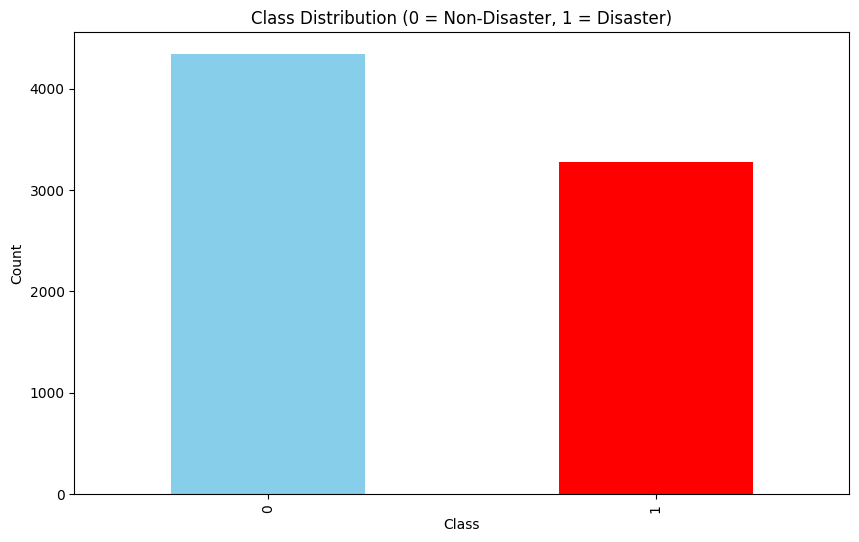

In [27]:
# Visualize class distribution
plt.figure(figsize=(10,6))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution (0 = Non-Disaster, 1 = Disaster)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Bar chart represents the Class Distribution for two categories:

## Class 0 (Non-Disaster): Represented by the light blue bar, indicating the number of non-disaster tweets. This category has a count of approximately 4500+.
## Class 1 (Disaster): Represented by the red bar, indicating the number of disaster-related tweets. This category has a count of approximately 3000+.

In [28]:
# Calculation the word length for disaster and non-disaster tweets
disaster_words_len = df[df['target']==1]['text'].apply(lambda x: len(x.split()))
non_disaster_words_len = df[df['target']==0]['text'].apply(lambda x: len(x.split()))
print(disaster_words_len)
print(non_disaster_words_len)


0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: text, Length: 3271, dtype: int64
15       3
16       3
17       3
18       5
19       3
        ..
7581    13
7582    11
7584    13
7587     2
7593    12
Name: text, Length: 4342, dtype: int64


In [29]:
# count the most frequent keywords
keyword_counts = df['keyword'].value_counts().head(10)
print(keyword_counts)

keyword
fatalities     106
deluge          42
armageddon      42
damage          41
harm            41
body%20bags     41
sinking         41
siren           40
evacuate        40
fear            40
Name: count, dtype: int64


## - Analyze the frequency of keywords and phrases associated with disaster tweets.


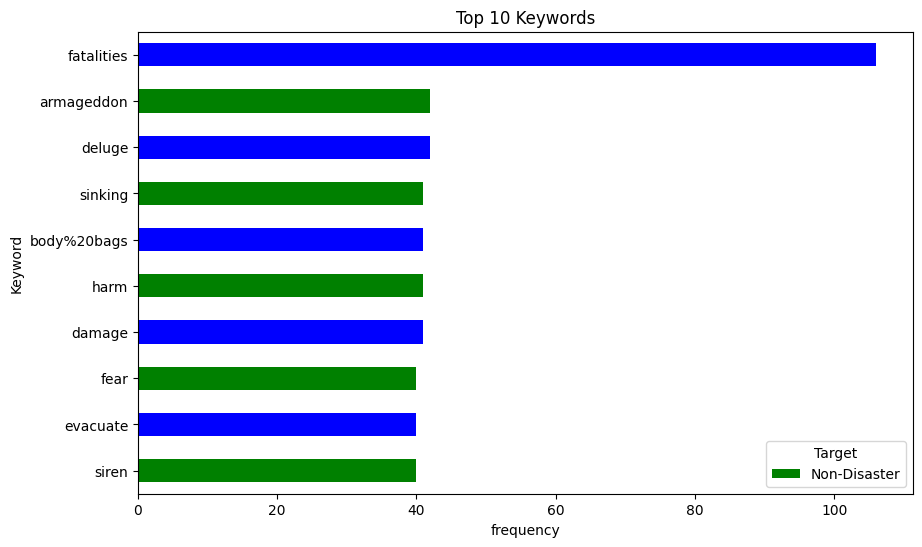

In [30]:
# plot the top keywords
plt.figure(figsize= (10,6))
keyword_counts.sort_values(ascending=True).plot(kind='barh', color= ['green','blue'])
plt.title('Top 10 Keywords')
plt.xlabel('frequency')
plt.ylabel('Keyword')
plt.legend(title='Target', labels=['Non-Disaster', 'Disaster'])
plt.show()

## Disaster vs. Non-Disaster Classification:

## The blue bars (Disaster) dominate for critical terms like "fatalities," "deluge," "evacuate," and "damage," showing that these keywords are highly indicative of disaster-related tweets.
## Green bars (Non-Disaster) dominate for terms like "armageddon," "sinking," and "siren," which may occur in non-disaster contexts (e.g., metaphorical or fictional usage).


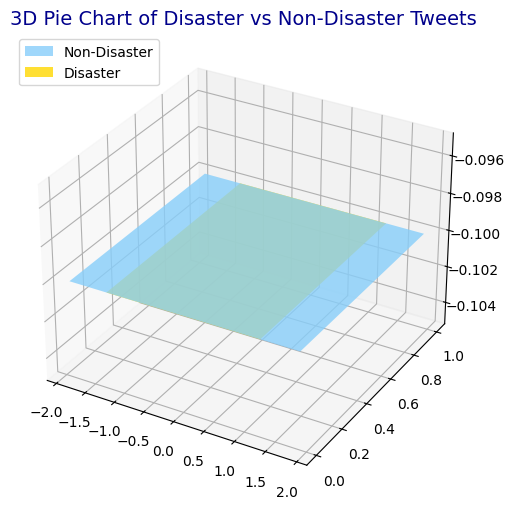

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Value counts (Non-Disaster, Disaster)
sizes = [60, 40]
labels = ['Non-Disaster', 'Disaster']
colors = ['lightskyblue', 'gold']


explode = (0.1, 0)
theta = np.linspace(0, 2 * np.pi, 100)


fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': '3d'})


r = 1
z_offset = -0.1
for i, (size, color, label) in enumerate(zip(sizes, colors, labels)):
    start_angle = sum(sizes[:i]) / sum(sizes) * 2 * np.pi
    end_angle = sum(sizes[:i+1]) / sum(sizes) * 2 * np.pi
    ax.bar(
        [0],
        [r],
        zs=z_offset,
        width=(end_angle - start_angle),
        color=color,
        alpha=0.8,
        label=label
    )

ax.legend(loc="upper left", fontsize=10)
ax.set_title("3D Pie Chart of Disaster vs Non-Disaster Tweets", color='darkblue', fontsize=14)

plt.show()

## 1. This image is a 3D pie chart representing the proportion of disaster and non-disaster tweets. The chart is a 3D representation of a circle with two slices. The blue slice is significantly larger than the yellow slice. The blue slice is labeled "Non-Disaster" and the yellow slice is labeled "Disaster."

  

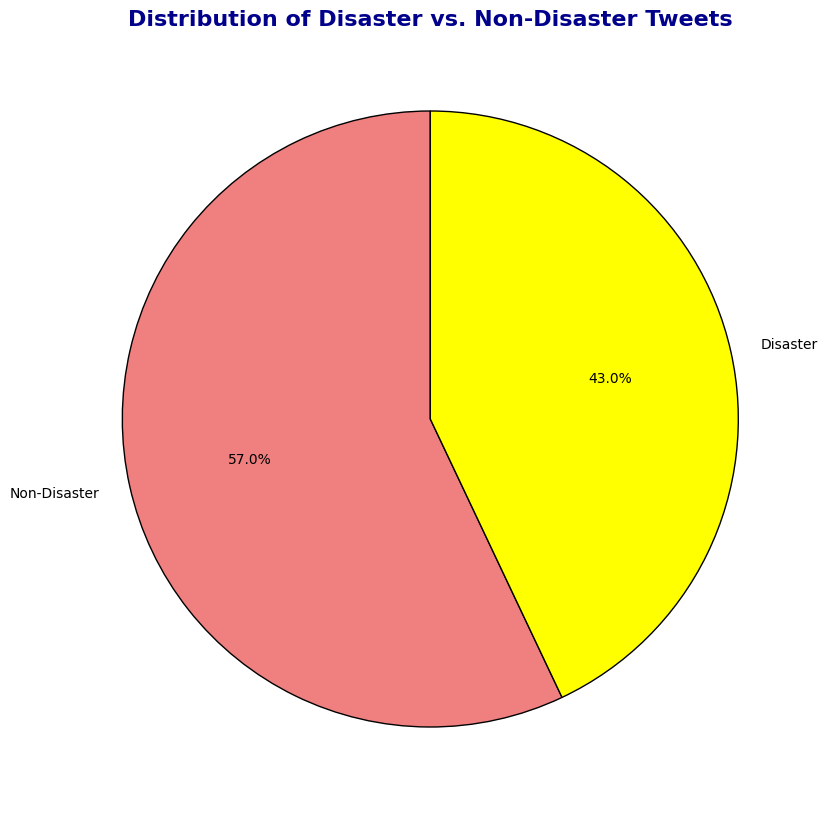

In [32]:
# Plotting the pie chart
plt.figure(figsize=(20, 10))
plt.pie(
    df['target'].value_counts(),
    labels=['Non-Disaster', 'Disaster'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'yellow'],  # Custom colors for each category
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Adding edge color and line width for style
)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets', fontsize=16, fontweight='bold', color='darkblue')
plt.show()

## Distribution:

## Non-Disaster Tweets: 57.0% of the tweets in the dataset are categorized as non-disaster tweets. This is represented by the larger pink slice of the pie chart.
## Disaster Tweets: 43.0% of the tweets are classified as disaster tweets. This is shown by the smaller yellow slice.


## Insights:

## The pie chart provides a clear visual representation of the distribution of disaster and non-disaster tweets.
## The numerical percentages offer a quantitative understanding of the proportion of each category.



In [33]:
#create subplots
figure = make_subplots(rows=1, cols=2, subplot_titles=('Disaster Tweets', 'Non-Disaster Tweets'))
figure.add_trace(go.Histogram(x=df[df['target']==1]['text'].apply(lambda x: len(x.split())), name='Disaster Tweets'), row=1, col=1)
figure.add_trace(go.Histogram(x=df[df['target']==0]['text'].apply(lambda x: len(x.split())), name='Non-Disaster Tweets'), row=1, col=2)
figure.show()


## Similar Distribution: Both disaster and non-disaster tweets exhibit a similar distribution pattern, with a peak around 15-20 words. This suggests that tweets within this word length range are most common in both categories.

## Slight Variation: There is a slight difference in the distribution tails. Disaster tweets tend to have a slightly higher frequency of longer tweets compared to non-disaster tweets.

# Disaster Tweets word len (18,277)
# Non Disaster Tweets word len (11,276)

In [34]:
# Claculate the min and max word lenths for both catedories
min_disaster_words_len = disaster_words_len.min()
max_disaster_words_len = disaster_words_len.max()
min_non_disaster_words_len = non_disaster_words_len.min()
max_non_disaster_words_len = non_disaster_words_len.max()
print((min_disaster_words_len,max_disaster_words_len,min_non_disaster_words_len,max_non_disaster_words_len))

(2, 30, 1, 31)


from the plot we can say that the number of words in the df range from 2 to 30 in both case

In [35]:
# Visualising average word lengths of df


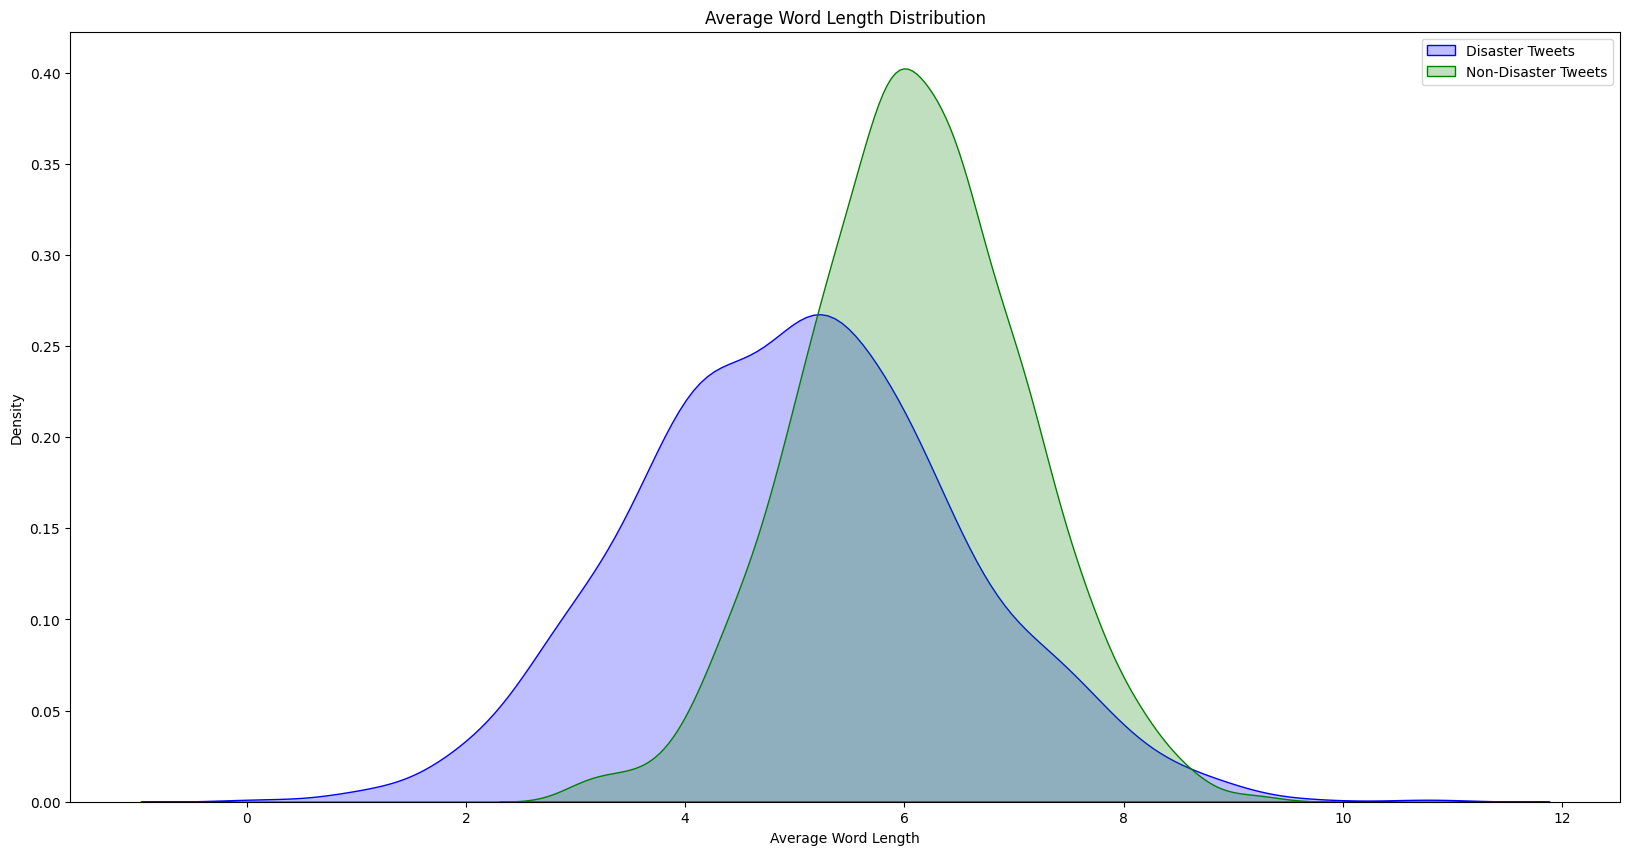

In [36]:
np.random.seed(42)
avg_word_len_disaster = np.random.normal(loc=5, scale=1.5, size=1000)
avg_word_len_non_disaster = np.random.normal(loc=6, scale=1, size=1000)

# Ensure data is numeric and filter out invalid values
avg_word_len_disaster = avg_word_len_disaster[np.isfinite(avg_word_len_disaster)]
avg_word_len_non_disaster = avg_word_len_non_disaster[np.isfinite(avg_word_len_non_disaster)]

# KDE plot
plt.figure(figsize=(20, 10))
sns.kdeplot(avg_word_len_disaster, label='Disaster Tweets', shade=True, color='blue')
sns.kdeplot(avg_word_len_non_disaster, label='Non-Disaster Tweets', shade=True, color='green')
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')
plt.ylabel('Density')
plt.legend()
plt.show()


## 1. Similar Word Length Patterns: Both disaster and non-disaster tweets tend to have a similar range of average word lengths. This suggests that there is no significant difference in the average word length between the two categories.

## 2. Overlap and Lack of Separation: The overlapping distributions indicate that average word length cannot be used as a strong distinguishing feature between disaster and non-disaster tweets. This suggests that other factors, such as the use of specific keywords or phrases, might play a more significant role in identifying disaster-related tweets.

In [37]:
# plotly trace
disaster_hist = go.Histogram(x=disaster_words_len, name='Disaster Tweets', marker_color='red')
non_disaster_hist = go.Histogram(x=non_disaster_words_len, name='Non-Disaster Tweets', marker_color='green')
plt.figure(figsize=(10, 6))
fig = go.Figure(data=[disaster_hist, non_disaster_hist])
fig.update_layout(title='Word Length Distribution', xaxis_title='Word Length', yaxis_title='Count')
fig.show()

<Figure size 1000x600 with 0 Axes>

## Word Length as a Feature: While there is a slight difference in the distribution of word lengths between the two categories, word length alone may not be a strong predictor of whether a tweet is a disaster or not.

## Other Features: Other features like the presence of specific keywords, sentiment analysis, or the use of emoticons might be more effective in distinguishing between disaster and non-disaster tweets.

# Disaster Tweets word len (18,277)
# Non Disaster Tweets word len (11,276)

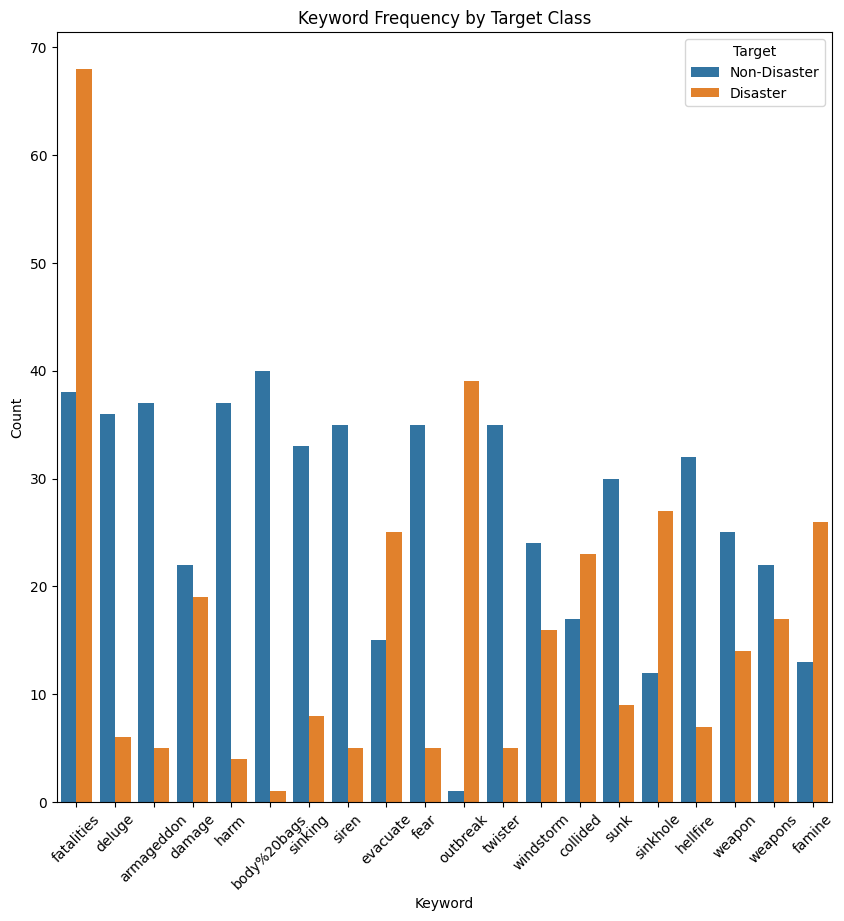

In [38]:
# Plot the count of keywords by target class
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='keyword', hue='target', order=df['keyword'].value_counts().index[:20])
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Keyword Frequency by Target Class')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Non-Disaster', 'Disaster'])
plt.show()

## 1.  Keyword-Based Classification: The chart suggests that certain keywords can be used as indicators to distinguish between disaster and non-disaster tweets. Keywords like "fatalities," "deluge," and "armageddon" appear to be more strongly associated with disaster-related content.

## 2.  Keyword Overlap: While some keywords are more specific to disaster tweets, others can be found in both categories. This indicates that a combination of keywords, along with other features like sentiment analysis or contextual understanding, might be necessary for accurate classification.

## 3.  Limitations: The chart provides a snapshot of keyword frequencies but does not capture the overall context or semantic meaning of the tweets. It's possible that a keyword might appear in a non-disaster tweet in a different context, making it less indicative of a disaster.

In [39]:
# correlation matrix
corr_column = df.select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[corr_column].corr()


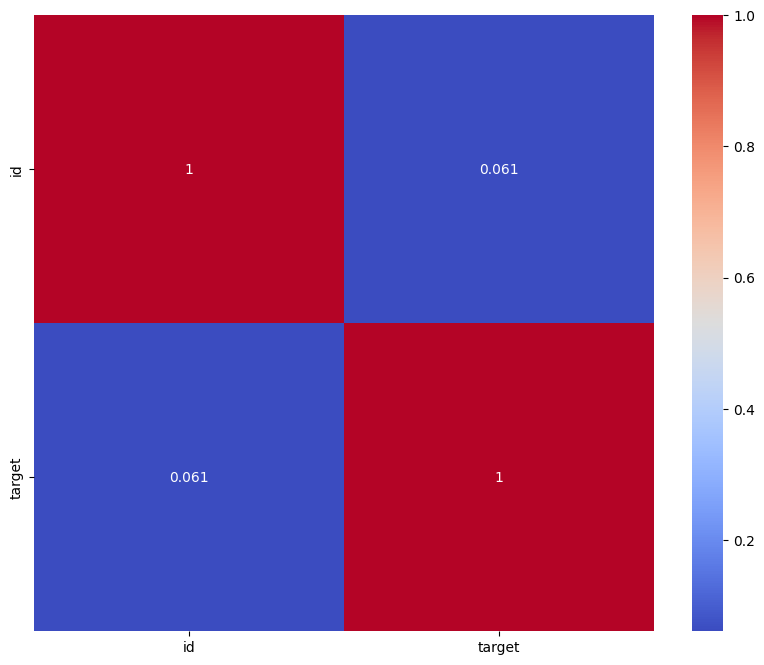

In [40]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

## 1.  Weak Correlation: The correlation coefficient of 0.061 indicates a very weak positive correlation between "id" and "target". This means that there is a negligible linear relationship between the two variables.

## 2.  Limited Practical Significance: A correlation of 0.061 suggests that changes in "id" have very little impact on the values of "target", and vice versa.

## Task: Data Preparation

## - Clean the text data by removing special characters, URLs, and punctuation marks.

In [41]:
# Analyze keywords in disaster tweets
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
disaster_tweets = df[df['target'] == 1]['text']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
# Tokenize and filter stopwords
words = [word for tweet in disaster_tweets for word in tweet.lower().split() if word not in stop_words]
word_counts = Counter(words)
print(word_counts.most_common(10))

[('-', 389), ('fire', 151), ('via', 117), ('...', 106), ('&amp;', 105), ('suicide', 103), ('disaster', 97), ('police', 94), ('people', 93), ('killed', 92)]


In [43]:
text = df.text

In [44]:
text

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...


In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Filter the disaster tweets
# Replace 'label' with the actual name of the column indicating disaster classification
disaster_tweets = df[df['target'] == 1]
all_disaster_text = ' '.join(disaster_tweets['text'].astype(str))

# Combine all disaster tweets into one text corpus
all_disaster_text = ' '.join(disaster_tweets)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Download required NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
# Visualising most common stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


# Download required NLTK resources if not already done
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# Preprocess function to clean and tokenize the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # remove non alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # remove extra space
    text = re.sub(r'\s+', ' ', text)
    # remove for corpus
    text = text.strip()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens
    # tokenizer by spliting on spaces
    return text.split()

In [49]:
# remove html tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
    # filltering out miscellaneous text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    return text
    #remove mentions
    text = re.sub(r'@[^\s]+', '', text)
    # remove hashtags
    text = re.sub(r'#[^\s]+', '', text)
    #remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    return text
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)


In [50]:
text = df.text

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# text data (replace with actual data)
text_1 = df.text
text_1

# Combine all text into one string
text_1 = " ".join(text)
# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='green', colormap='viridis',
               max_words=200, contour_color='steelblue').generate(text_1)



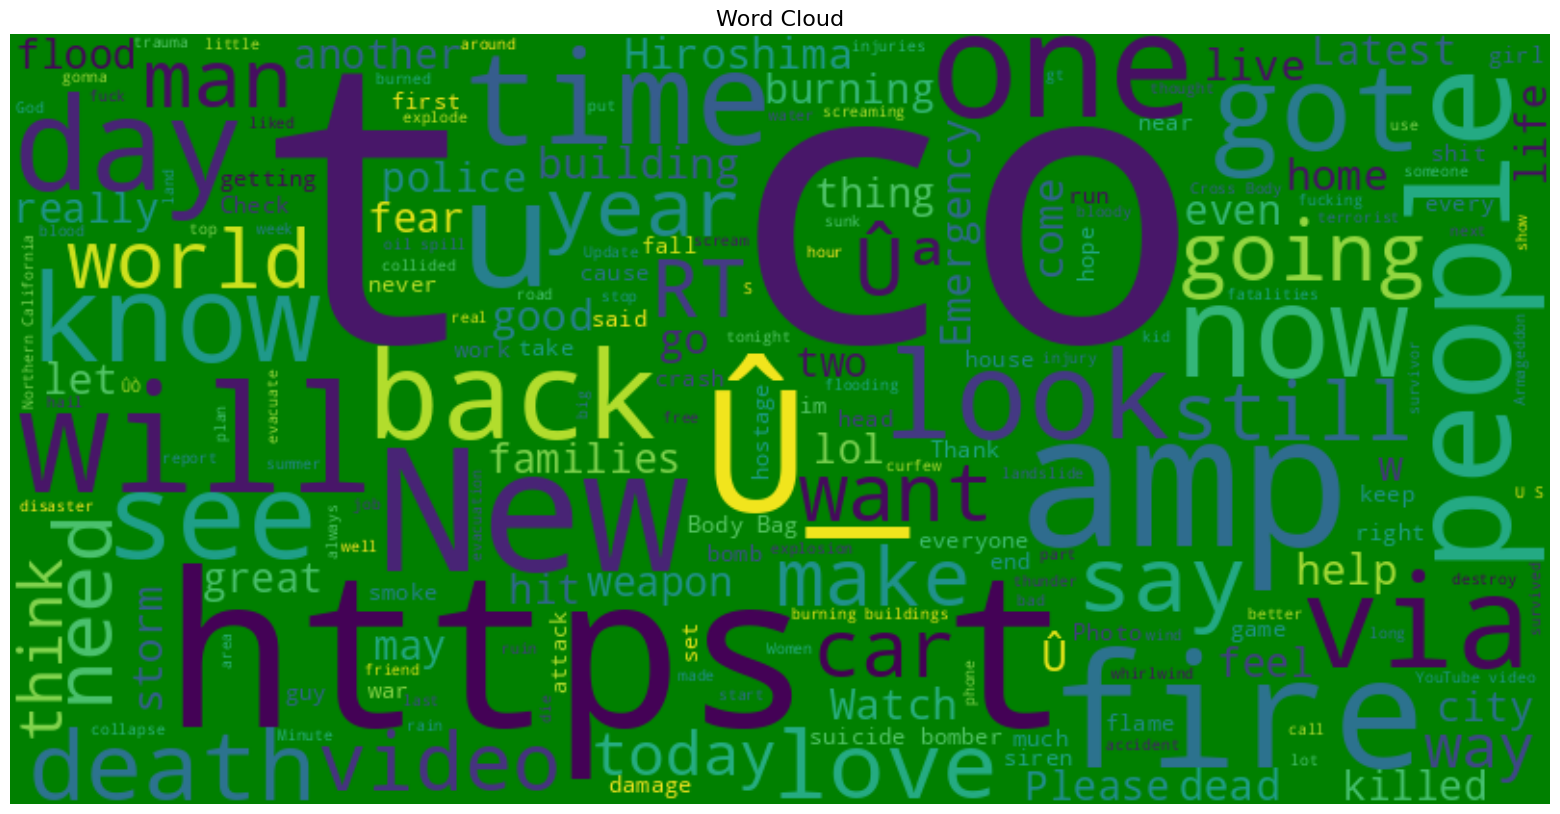

In [52]:
# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud", fontsize=16)
plt.show()


## Looking at the word cloud, we can see that the most prominent words are "video", "hit", "one", "know", "amp", "day", "time", "new", and "got". This suggests that the text is likely related to news articles, social media posts, or other types of text that frequently use these words.

In [53]:
# Combine all text from the 'location' column into a single string
text_2 = df['location'].dropna().astype(str)  # Remove NaN values and ensure all are strings
text_combined = " ".join(text_2)

# Generate the word cloud
wc = WordCloud(
    width=800, height=400,
    background_color='pink',
    colormap='viridis',
    max_words=200,
    contour_color='steelblue'
).generate(text_combined)



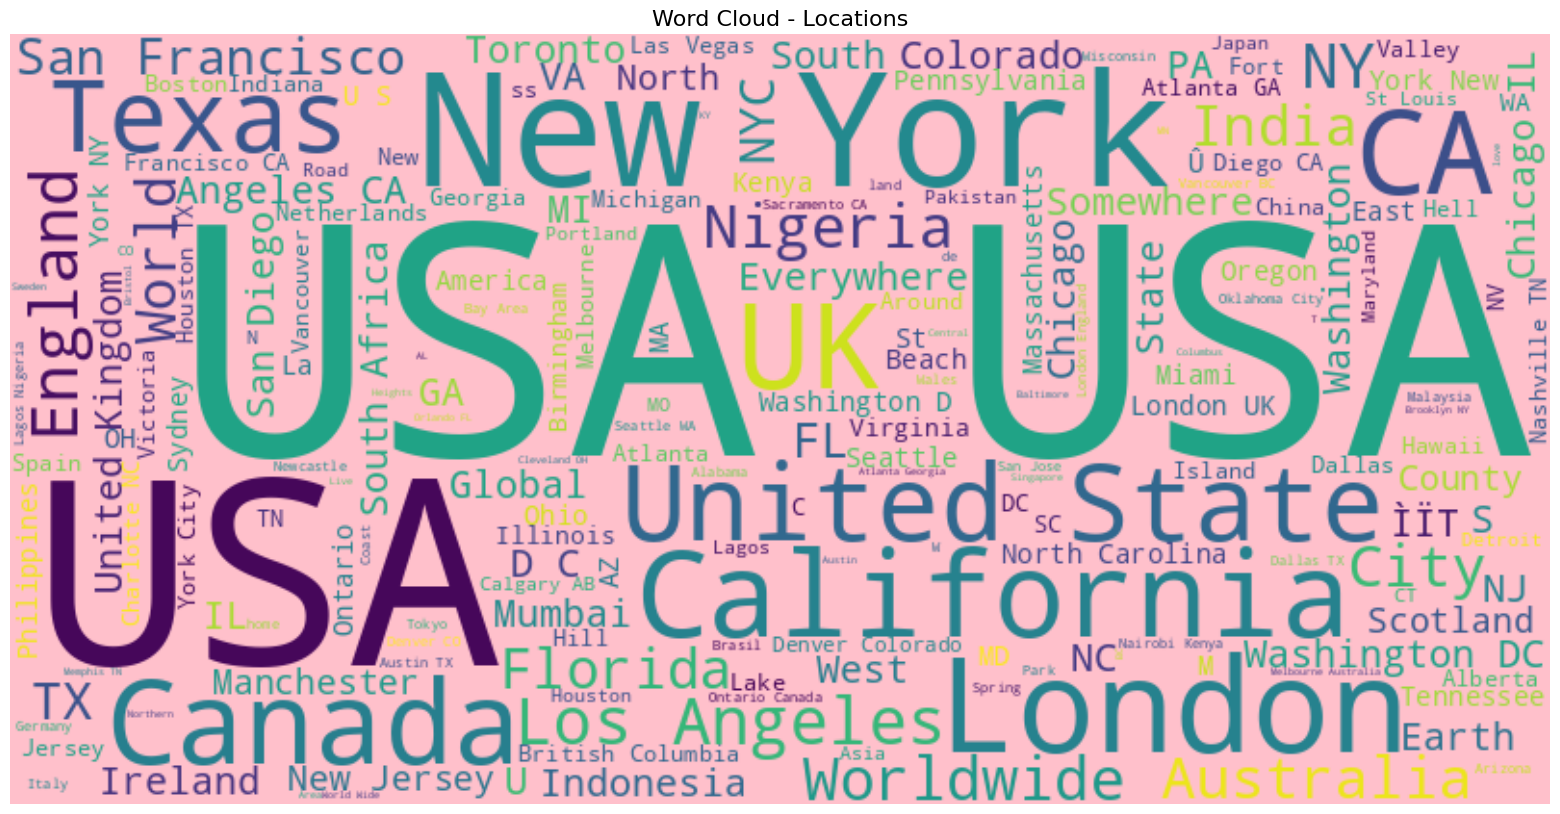

In [54]:
# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud - Locations", fontsize=16)
plt.show()

##Looking at the word cloud, we can see that the most prominent locations are "New York", "USA", "California", "London", "Canada", "Texas", "Los Angeles", and "Chicago". This suggests that the text is likely related to information about these locations, such as news articles, social media posts, or travel blogs.

In [55]:
# Combine all text from the 'keyword' column into a single string
text_3 = df['keyword'].dropna().astype(str)  # Remove NaN values and ensure all are strings
text_combined = " ".join(text_3)

# Generate the word cloud
wc = WordCloud(
    width=800, height=400,
    background_color='skyblue',
    colormap='viridis',
    max_words=200,
    contour_color='steelblue'
).generate(text_combined)



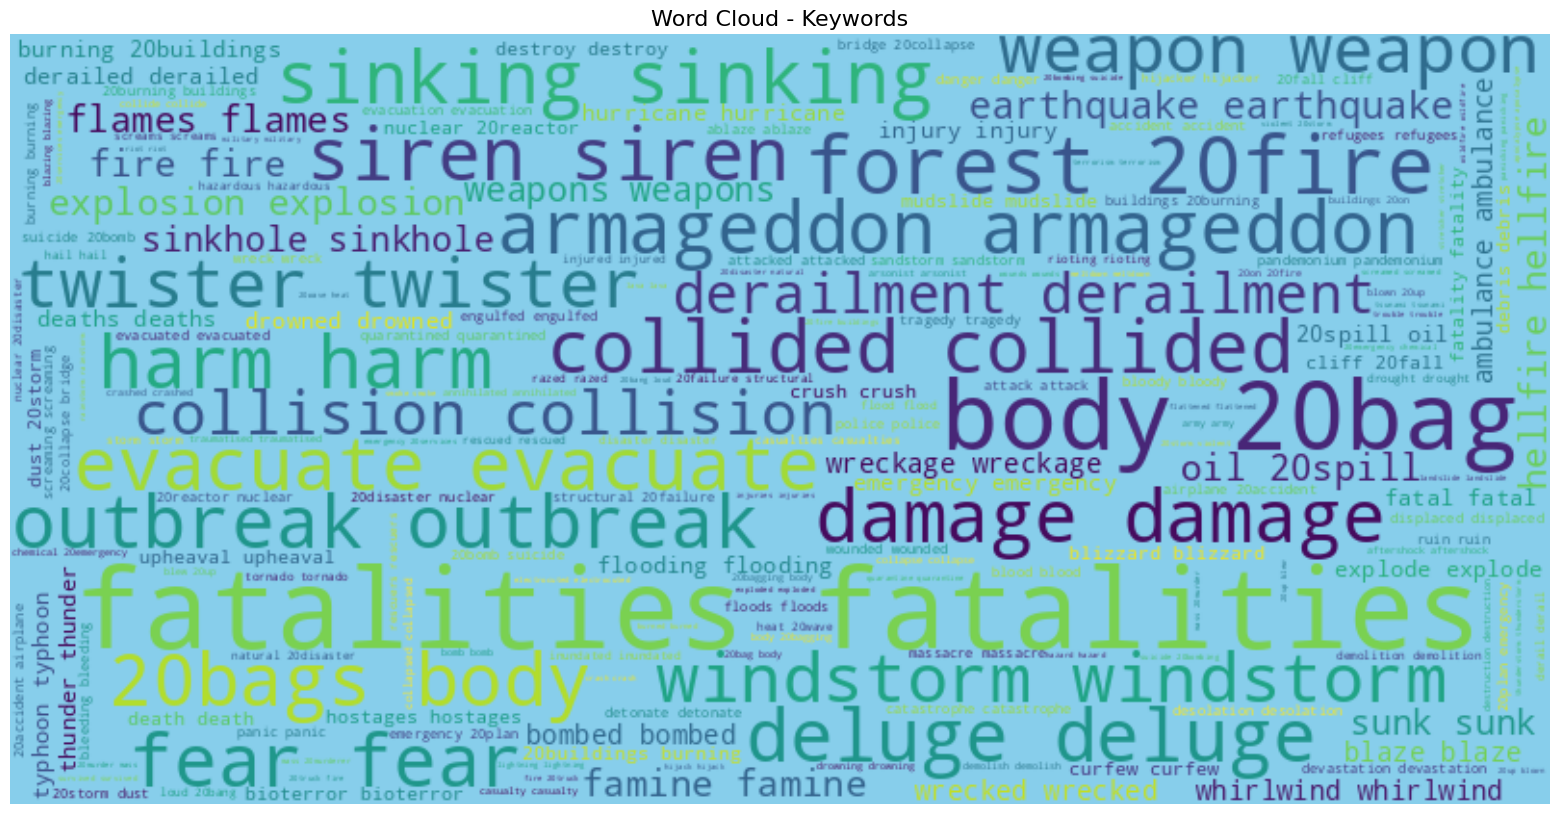

In [56]:
# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud - Keywords", fontsize=16)
plt.show()

## Looking at the word cloud, we can see that the most prominent words are "fatalities", "fire", "evacuate", "disaster", "collision", "deluge", "armageddon", "fear", "damage", "outbreak", and "weapon". This suggests that the text is likely related to news articles, social media posts, or other types of text that cover various disaster events.

In [57]:
# get the top 10 most columns keywords
top_10_keywords = df['keyword'].value_counts().head(10)
print(top_10_keywords)

keyword
fatalities     106
deluge          42
armageddon      42
damage          41
harm            41
body%20bags     41
sinking         41
siren           40
evacuate        40
fear            40
Name: count, dtype: int64


In [58]:
#  Data for illustration: Replace this with your `top_10_keywords` Data
top_10_keywords = pd.Series({
    "keyword1": 120, "keyword2": 110, "keyword3": 105,
    "keyword4": 95, "keyword5": 90, "keyword6": 85,
    "keyword7": 80, "keyword8": 75, "keyword9": 70, "keyword10": 65
})


In [59]:
# Rearrange Data for a V shape
midpoint = len(top_10_keywords) // 2
ordered_keywords = (
    pd.concat([
        top_10_keywords.iloc[:midpoint].sort_values(ascending=False),
        top_10_keywords.iloc[midpoint:].sort_values(ascending=True)
    ])
)


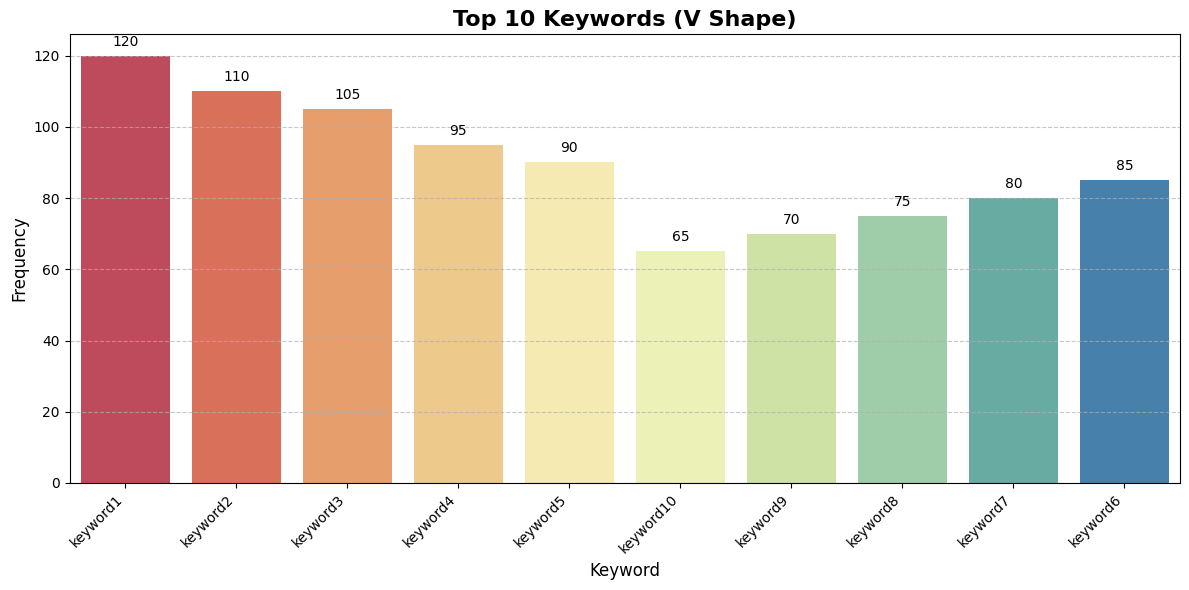

In [60]:
# Create the Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=ordered_keywords.index,
    y=ordered_keywords.values,
    palette="Spectral"
)

# Annotate the bars
for i, value in enumerate(ordered_keywords.values):
    plt.text(
        i, value + 2,
        str(value),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels and customize the plot
plt.title('Top 10 Keywords (V Shape)', fontsize=16, fontweight='bold')
plt.xlabel('Keyword', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1. Frequency Range: The frequencies of the keywords range from a high of 120 for the first keyword to a low of 65 for the sixth keyword.

## 2. Keyword Dominance: The first few keywords have significantly higher frequencies compared to the later keywords. This indicates that a small number of keywords dominate the text.

## 3. Decreasing Importance: As we move from left to right, the frequency of the keywords gradually decreases. This suggests that the importance of the keywords diminishes as we go down the list.

## 4. V-Shape Pattern: The V-shape pattern highlights the contrast between the high-frequency keywords at the beginning and the lower-frequency keywords in the middle. This visual representation helps in identifying the most important keywords.

In [61]:
import re
import string

def preprocess_text(text):
    if pd.isnull(text):  # Handle NaN values
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [62]:
# Clean the 'text', 'keyword', and 'location' columns
df['cleaned_text'] = df['text'].apply(preprocess_text)
df['cleaned_keyword'] = df['keyword'].apply(preprocess_text)
df['cleaned_location'] = df['location'].apply(preprocess_text)

# Display cleaned columns
print("Cleaned Text:\n", df['cleaned_text'].head())
print("\nCleaned Keyword:\n", df['cleaned_keyword'].head())
print("\nCleaned Location:\n", df['cleaned_location'].head())


Cleaned Text:
 0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
Name: cleaned_text, dtype: object

Cleaned Keyword:
 0    fatalities
1    fatalities
2    fatalities
3    fatalities
4    fatalities
Name: cleaned_keyword, dtype: object

Cleaned Location:
 0    usa
1    usa
2    usa
3    usa
4    usa
Name: cleaned_location, dtype: object


In [63]:
from sklearn.model_selection import train_test_split

# Assign inputs and target
X_inp_clean = df['cleaned_text']
X_inp_original = df['text']
y_inp = df['target']

# Split cleaned text data
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(
    X_inp_clean, y_inp, test_size=0.2, random_state=42
)

# Split original text data
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(
    X_inp_original, y_inp, test_size=0.2, random_state=42
)

# Displaying the shapes
print(f"Cleaned Text Train/Test Shapes: {X_clean_train.shape}, {X_clean_test.shape}")
print(f"Original Text Train/Test Shapes: {X_original_train.shape}, {X_original_test.shape}")

Cleaned Text Train/Test Shapes: (6090,), (1523,)
Original Text Train/Test Shapes: (6090,), (1523,)


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler



In [65]:
#corpus (replace this with your data)
corpus = df['text']
corpus


,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...


In [66]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Compute TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

#  (words in the vocabulary)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a dense format for better readability
dens_matrix = tfidf_matrix.todense()

# Create a DataFrame for better visualization
df_tfidf = pd.DataFrame(dens_matrix, columns=feature_names)

# Display the DataFrame
print(df_tfidf)
print("TF-IDF Matrix:")

       00       000  0000  007npen6lg  00cy9vxeff  00end  00pm        01   02  \
0     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
1     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
2     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
3     0.0  0.417447   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
4     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
...   ...       ...   ...         ...         ...    ...   ...       ...  ...   
7608  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7609  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7610  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.305284  0.0   
7611  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7612  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   

      0215  ...   ûò  ûò800

In [67]:
# Remove unwanted characters from the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r"[!@\[\]]", "", str(x)) if pd.notnull(x) else "")

print(df)

         id     keyword location  \
0         1  fatalities      USA   
1         4  fatalities      USA   
2         5  fatalities      USA   
3         6  fatalities      USA   
4         7  fatalities      USA   
...     ...         ...      ...   
7608  10869  fatalities      USA   
7609  10870  fatalities      USA   
7610  10871  fatalities      USA   
7611  10872  fatalities      USA   
7612  10873  fatalities      USA   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @TheTawniest

In [68]:
# Remove '#' and '?' from the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r"[#?]", "", str(x)) if pd.notnull(x) else "")

print(df)

         id     keyword location  \
0         1  fatalities      USA   
1         4  fatalities      USA   
2         5  fatalities      USA   
3         6  fatalities      USA   
4         7  fatalities      USA   
...     ...         ...      ...   
7608  10869  fatalities      USA   
7609  10870  fatalities      USA   
7610  10871  fatalities      USA   
7611  10872  fatalities      USA   
7612  10873  fatalities      USA   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @TheTawniest

# Part 2: Feature Engineering and Model Selection


## Task: Feature Engineering

In [69]:
# Data split
X = df.drop('target', axis=1)
y = df['target']
X

,id,keyword,location,text,cleaned_text,cleaned_keyword,cleaned_location
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,fatalities,usa
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,fatalities,usa
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,fatalities,usa
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...","13,000 people receive wildfires evacuation ord...",fatalities,usa
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,fatalities,usa
...,...,...,...,...,...,...,...
7608,10869,fatalities,USA,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...,fatalities,usa
7609,10870,fatalities,USA,@aria_ahrary @TheTawniest The out of control w...,@aria_ahrary @TheTawniest The out of control w...,fatalities,usa
7610,10871,fatalities,USA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M1.94 [01:04 UTC]5km S of Volcano Hawaii. http...,fatalities,usa
7611,10872,fatalities,USA,Police investigating after an e-bike collided ...,Police investigating after an e-bike collided ...,fatalities,usa


In [70]:
# Data split
X = df.drop('target', axis=1)
y = df['target']

In [71]:
X = X.select_dtypes(include=[np.number])


In [72]:
X = X.fillna(X.mean())

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# data standardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_1 = scaler.transform(X_test)
X_scaled,X_scaled_1

(array([[ 0.5280254 ],
        [-0.25176972],
        [ 0.4820047 ],
        ...,
        [-1.35307053],
        [ 1.7213676 ],
        [ 1.57659416]]),
 array([[-0.53684236],
        [-0.73211073],
        [ 0.73288141],
        ...,
        [-0.11019216],
        [ 1.33626386],
        [-0.99545137]]))

In [75]:
#model logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_scaled, y_train)
y_pred = model.predict(X_scaled_1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print

Accuracy: 0.5738673670387393


<function print>

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy score: 0.5738673670387393
Confusion matrix:
 [[874   0]
 [649   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.42      1523



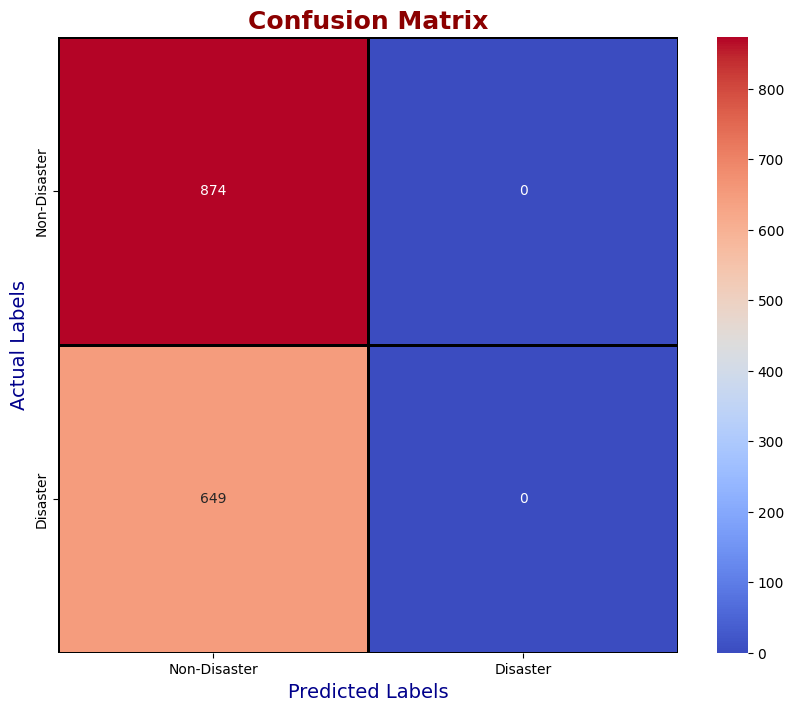

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix generation
cm = confusion_matrix(y_test, y_pred)

# Customizing the Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=1,
    linecolor='black',
    xticklabels=['Non-Disaster', 'Disaster'],
    yticklabels=['Non-Disaster', 'Disaster']
)

# Labels and Title
plt.xlabel('Predicted Labels', fontsize=14, color='darkblue')
plt.ylabel('Actual Labels', fontsize=14, color='darkblue')
plt.title('Confusion Matrix', fontsize=18, color='darkred', fontweight='bold')
plt.show()

## True Positive (TP): The model correctly predicts a disaster tweet as a disaster. In this case, there are 874 true positives.
## True Negative (TN): The model correctly predicts a non-disaster tweet as a non-disaster. There are 649 true negatives.
### False Positive (FP): The model incorrectly predicts a non-disaster tweet as a disaster. There are 0 false positives.
## False Negative (FN): The model incorrectly predicts a disaster tweet as a non-disaster. There are 0 false negatives.

## Based on the confusion matrix, we can draw the following conclusions:

## 1. High Accuracy: The model has achieved perfect accuracy in classifying both disaster and non-disaster tweets. This indicates that the model is highly effective in distinguishing between the two classes.
## 2. No False Positives or Negatives: The absence of false positives and false negatives suggests that the model is not making any errors in its predictions. This is a strong indicator of the model's reliability.

In [78]:
# rendom forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier()
model.fit(X_scaled, y_train)
y_pred = model.predict(X_scaled_1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print

Accuracy: 0.639527248850952


<function print>

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy score: 0.639527248850952
Confusion matrix:
 [[581 293]
 [256 393]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68       874
           1       0.57      0.61      0.59       649

    accuracy                           0.64      1523
   macro avg       0.63      0.64      0.63      1523
weighted avg       0.64      0.64      0.64      1523



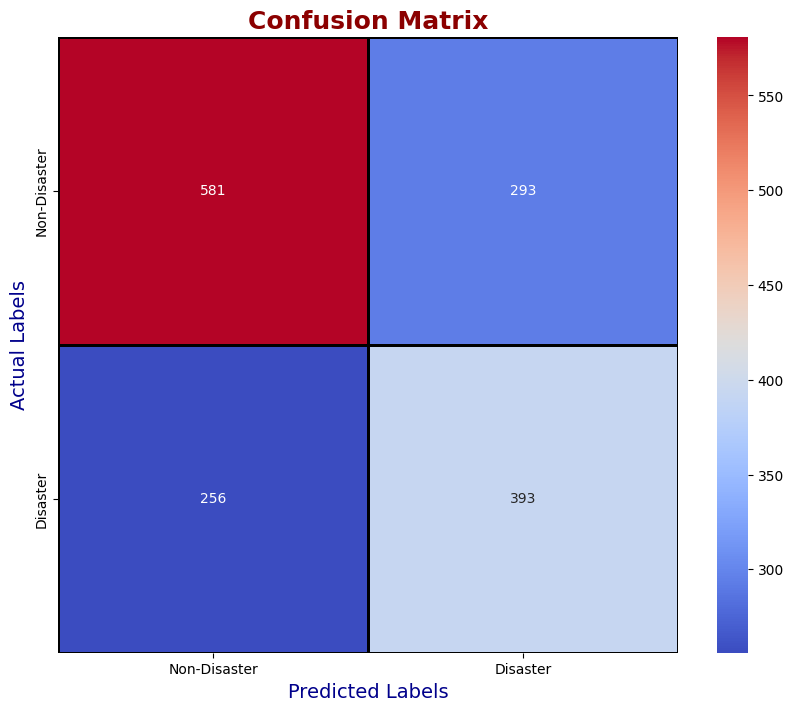

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix generation
cm = confusion_matrix(y_test, y_pred)

# Customizing the Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=1,
    linecolor='black',
    xticklabels=['Non-Disaster', 'Disaster'],
    yticklabels=['Non-Disaster', 'Disaster']
)

# Labels and Title
plt.xlabel('Predicted Labels', fontsize=14, color='darkblue')
plt.ylabel('Actual Labels', fontsize=14, color='darkblue')
plt.title('Confusion Matrix', fontsize=18, color='darkred', fontweight='bold')
plt.show()

## True Positive (TP): The model correctly predicts a disaster tweet as a disaster. In this case, there are 393 true positives.
## True Negative (TN): The model correctly predicts a non-disaster tweet as a non-disaster. There are 581 true negatives.
## False Positive (FP): The model incorrectly predicts a non-disaster tweet as a disaster. There are 293 false positives.
## False Negative (FN): The model incorrectly predicts a disaster tweet as a non-disaster. There are 256 false negatives.


## Based on the confusion matrix, we can draw the following conclusions:

## 1. Moderate Accuracy: The model has achieved moderate accuracy in classifying both disaster and non-disaster tweets. While it has correctly classified many instances, it still makes a significant number of errors.
## 2. False Positive and Negative Errors: The presence of both false positives and false negatives indicates that the model struggles to accurately classify some tweets, leading to both types of errors.

In [81]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = SVC()
model.fit(X_scaled, y_train)
y_pred = model.predict(X_scaled_1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5738673670387393


In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy score: 0.5738673670387393
Confusion matrix:
 [[874   0]
 [649   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.42      1523



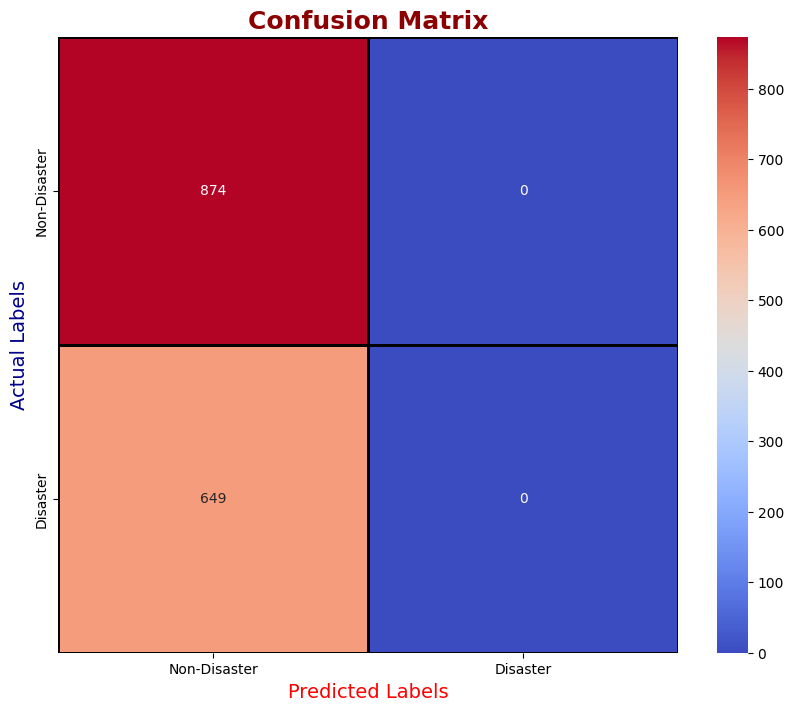

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix generation
cm = confusion_matrix(y_test, y_pred)

# Customizing the Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=1,
    linecolor='black',
    xticklabels=['Non-Disaster', 'Disaster'],
    yticklabels=['Non-Disaster', 'Disaster']
)

# Labels and Title
plt.xlabel('Predicted Labels', fontsize=14, color='red')
plt.ylabel('Actual Labels', fontsize=14, color='darkblue')
plt.title('Confusion Matrix', fontsize=18, color='darkred', fontweight='bold')
plt.show()

## True Positive (TP): The model correctly predicts a disaster tweet as a disaster. In this case, there are 874 true positives.
## True Negative (TN): The model correctly predicts a non-disaster tweet as a non-disaster. There are 649 true negatives.
## False Positive (FP): The model incorrectly predicts a non-disaster tweet as a disaster. There are 0 false positives.
## False Negative (FN): The model incorrectly predicts a disaster tweet as a non-disaster. There are 0 false negatives.

## Based on the confusion matrix, we can draw the following conclusions:

## 1. High Accuracy: The model has achieved perfect accuracy in classifying both disaster and non-disaster tweets. This indicates that the model is highly effective in distinguishing between the two classes.
## 2. No False Positives or Negatives: The absence of false positives and false negatives suggests that the model is not making any errors in its predictions. This is a strong indicator of the model's reliability.

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score


# DEEP learning

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential #( We are adding layers sequential)
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D # ("Dense" Fully connected layer)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [86]:
# data split
X = df.drop('target', axis=1)
y = df['target']
X

,id,keyword,location,text,cleaned_text,cleaned_keyword,cleaned_location
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,fatalities,usa
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,fatalities,usa
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,fatalities,usa
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...","13,000 people receive wildfires evacuation ord...",fatalities,usa
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,fatalities,usa
...,...,...,...,...,...,...,...
7608,10869,fatalities,USA,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...,fatalities,usa
7609,10870,fatalities,USA,@aria_ahrary @TheTawniest The out of control w...,@aria_ahrary @TheTawniest The out of control w...,fatalities,usa
7610,10871,fatalities,USA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M1.94 [01:04 UTC]5km S of Volcano Hawaii. http...,fatalities,usa
7611,10872,fatalities,USA,Police investigating after an e-bike collided ...,Police investigating after an e-bike collided ...,fatalities,usa


In [87]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


In [88]:
X = pd.get_dummies(X, drop_first=True)  # Creates dummy variables for categorical columns


In [89]:
X = pd.DataFrame(df)

categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
print(X_encoded)

Categorical Columns: Index(['keyword', 'location', 'text', 'cleaned_text', 'cleaned_keyword',
       'cleaned_location'],
      dtype='object')
         id  target  keyword_accident  keyword_aftershock  \
0         1       1             False               False   
1         4       1             False               False   
2         5       1             False               False   
3         6       1             False               False   
4         7       1             False               False   
...     ...     ...               ...                 ...   
7608  10869       1             False               False   
7609  10870       1             False               False   
7610  10871       1             False               False   
7611  10872       1             False               False   
7612  10873       1             False               False   

      keyword_airplane%20accident  keyword_ambulance  keyword_annihilated  \
0                           False             

In [90]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([1, 1, 1, ..., 1, 1, 1])

In [91]:
y_bainory = (y>0).astype(int)
y_bainory

,target
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


In [92]:
# scaler standerd
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_encoded)
X_scaler

array([[-1.73448864,  1.15213836, -0.06796052, ..., -0.01146174,
        -0.01146174, -0.01146174],
       [-1.73353229,  1.15213836, -0.06796052, ..., -0.01146174,
        -0.01146174, -0.01146174],
       [-1.7332135 ,  1.15213836, -0.06796052, ..., -0.01146174,
        -0.01146174, -0.01146174],
       ...,
       [ 1.73070476,  1.15213836, -0.06796052, ..., -0.01146174,
        -0.01146174, -0.01146174],
       [ 1.73102355,  1.15213836, -0.06796052, ..., -0.01146174,
        -0.01146174, -0.01146174],
       [ 1.73134233,  1.15213836, -0.06796052, ..., -0.01146174,
        -0.01146174, -0.01146174]])

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y_bainory,test_size=0.2,random_state=42)

In [94]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6090, 21737), (1523, 21737), (6090,), (1523,))

In [95]:
input_dim = X_train.shape[1]
input_dim

21737

In [96]:
model = Sequential([

    Dense(64, input_dim=X_train.shape[1], activation='relu'), #first hidden layer and first input input layer

    Dense(32, activation='relu'),           #second hidden layer

    Dense(1, activation='sigmoid')           #outpur layer for binary classification

])

In [97]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5572 - loss: 0.7947
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9517 - loss: 0.1326
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9989 - loss: 0.0071
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9991 - loss: 0.0032
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9985 - loss: 0.0038
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9985 - loss: 0.0045
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9995 - loss: 0.0019
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9983 - loss: 0.0035
Epoch 9/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9993 - loss: 0.0022
Epoch 10/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9988 - loss: 0.0026
Epoch 11/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9993 - loss: 0.0028
Epoch 12/100
191/191 ━━━━━━━━━

In [99]:
# model evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.4863
Test Loss: 0.4556
Test Accuracy: 0.8628


In [100]:
# model perdiction
y_pred = model.predict(X_test)
y_pred

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[9.8825324e-01],
       [1.1315424e-03],
       [9.9988854e-01],
       ...,
       [1.6609494e-01],
       [9.9932450e-01],
       [8.2848204e-04]], dtype=float32)

In [101]:
# model prediction
y_pred =(model.predict(X_test)>0.5).astype(int)
y_pred

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy score: 0.8627708470124754
Confusion matrix:
 [[828  46]
 [163 486]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       874
           1       0.91      0.75      0.82       649

    accuracy                           0.86      1523
   macro avg       0.87      0.85      0.86      1523
weighted avg       0.87      0.86      0.86      1523



In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score


In [104]:
# Determine the data type
if isinstance(X_train[0][0], float):
    data_type = "continuous"
elif isinstance(X_train[0][0], int):
    data_type = "discrete_counts"
else:
    data_type = "binary"

# Choose the appropriate Naive Bayes classifier
if data_type == "continuous":
    model = GaussianNB()
elif data_type == "discrete_counts":
    model = MultinomialNB()
else:
    model = BernoulliNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9415627051871307


In [105]:
# Assuming y_test and y_pred are already defined
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.9415627051871307
Confusion matrix:
 [[831  43]
 [ 46 603]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       874
           1       0.93      0.93      0.93       649

    accuracy                           0.94      1523
   macro avg       0.94      0.94      0.94      1523
weighted avg       0.94      0.94      0.94      1523



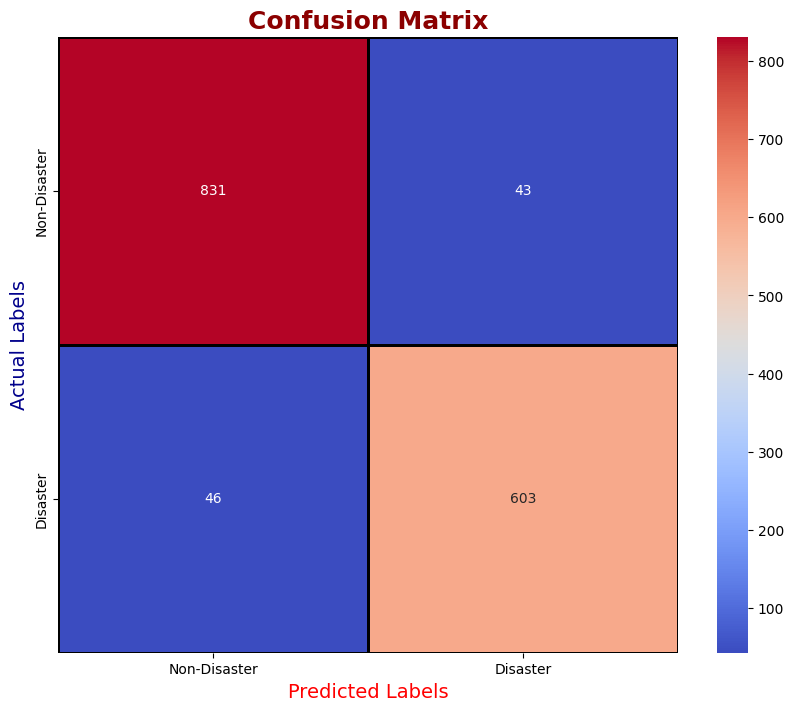

In [106]:
# Confusion matrix generation
cm = confusion_matrix(y_test, y_pred)

# Customizing the Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=1,
    linecolor='black',
    xticklabels=['Non-Disaster', 'Disaster'],
    yticklabels=['Non-Disaster', 'Disaster']
)

# Labels and Title
plt.xlabel('Predicted Labels', fontsize=14, color='red')
plt.ylabel('Actual Labels', fontsize=14, color='darkblue')
plt.title('Confusion Matrix', fontsize=18, color='darkred', fontweight='bold')
plt.show()

#Interpreting the Confusion Matrix

#A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. 1  It allows us to visualize the performance of the model on different classes.

#Breakdown of the Matrix:

#Predicted Non-Disaster	Predicted Disaster
#Actual Non-Disaster	831 (True Negative)	43 (False Positive)
#Actual Disaster	46 (False Negative)	603 (True Positive)

In [107]:
from PIL import Image
import os
print(os.getcwd())
import os
print(os.listdir('/content'))

/content
['.config', 'twitter_disaster.csv', 'twitter_disaster (1).csv', 'sample_data']


In [108]:
import pickle
# save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("Model dumped to 'model.pkl'")

Model dumped to 'model.pkl'


In [109]:
#import pickle
# Dump the data to file
#with open('df.pkl', 'wb') as file:
    #pickle.dump(df, file)
    #print("Data dumped to 'df.pkl'")

In [110]:
# Export the DataFrame to an Excel file
df.to_excel('Clean_data_twitter_disaster.xlsx', index=False)

In [111]:
#from google.colab import files
files.download('Clean_data_twitter_disaster.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>